# NLP- Analysis

# Abstract:

This notebook consists of :

1. Applying Text_cleaning on reviews grouped by star_ratings
2. Sentiment Analysis including Polarity and Subjectivity
3. Comparing review_polarities vs review_star_ratings to reflect which term is more informative
4. TF_IDF and word_count analysis to reflect how important a word is to a review and how many times it has been repeated
5. Word-Embeding analysis to gain further insights about boutique reviews 

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')
import re
import nltk
import string
import pickle

from gensim.models import Phrases
from gensim.models import Word2Vec
from gensim.models.phrases import Phraser
from gensim.summarization.textcleaner import split_sentences

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.manifold import TSNE

from sklearn.decomposition import PCA
from matplotlib import pyplot

from textblob import TextBlob, Word, Blobber
# to install textblob in your conda packages:
# 1. go to anaconda prompt
# 2. cd Anaconda3>Scripts>conda install -c conda-forge textblob
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('words')
nltk.download('stopwords')
from nltk import word_tokenize,sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\farnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\farnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\farnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from NLP_Analysis_classes import sentiment_analysis

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\farnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\farnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\farnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Import required dataframes from web scraping notebook  to start analysing

1. boutique names and information "boutique_info"  
2. boutique reviews "boutique_review" 

In [5]:
#import the final boutique_info dataframe from the web scraping notebooke:
with open('boutique_info.pickle','rb') as f_read:
    boutique_info = pickle.load(f_read)
#set wider columns to check the reviews:    
pd.options.display.max_colwidth = 200 
#boutique_info.head()

In [6]:
#import the final boutique_review dataframe from the web scraping notebooke:
with open('boutique_reviews.pickle','rb') as f_read:
    boutique_reviews = pickle.load(f_read)
#set wider columns to check the reviews:
pd.options.display.max_colwidth = 500  
#delete unnecessary columns like review_counts:
del boutique_reviews['review_counts']
#boutique_reviews.head()

## Sentiment Analysis:

#### 1. Apply text cleaning and stop-words removal to clean each review
#### 2. Get the sentiment of each review
#### 3. Display polarity over time for each specific boutique to monitor the customer satisfaction during time
we will consider a time period of two years
#### 4.Comparing review_polarity vs review_star_ratings

current_date:  2008-04-05 00:00:00
end_date:  2020-04-26 00:00:00
window_start:  2007-04-11 00:00:00
window_end:  2009-03-31 00:00:00
time_delta:  30 days 00:00:00


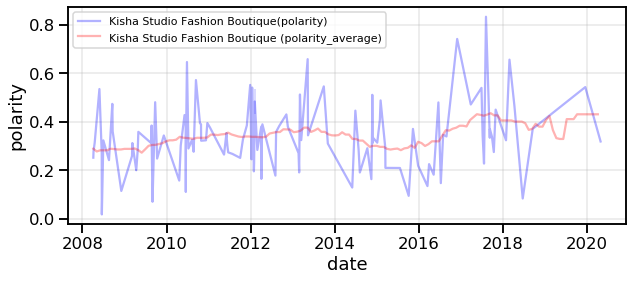

In [7]:
boutique_list = ["Kisha Studio Fashion Boutique"]
obj = sentiment_analysis(boutique_reviews)
obj.sentiment_analysis_summary(boutique_list)

**So the sentiment analysis shows that review_polarity for Kishna Boutique will increases during the time.**

**Compare review_polarity vs review_star_ratings**:

120 reviews used


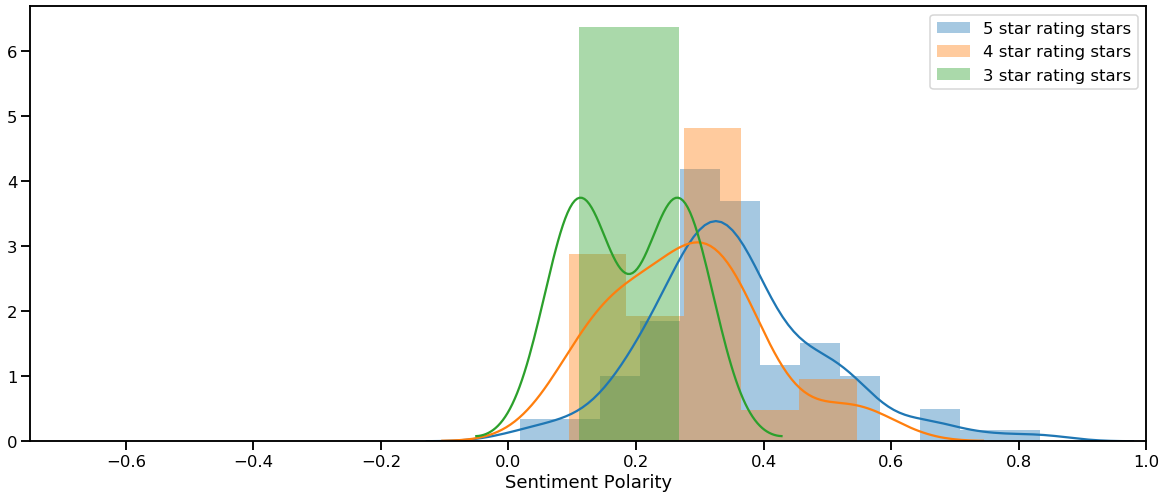

In [8]:
boutique_list=["Kisha Studio Fashion Boutique"]
obj_c = sentiment_analysis(boutique_reviews)
subset_df_clean = obj_c.clean_review(boutique_list)
subset_df_clean_sentiment = obj_c.subset_df_sentiment(subset_df_clean)
obj_c.compare_polarity_vs_ratings(subset_df_clean_sentiment)

**So as predicted, reviews with more star_ratings, have the higher polarity.**